# Gemini API demo

## Install api

In [1]:
!pip install -qU google-generativeai

## Initialize the model

In [2]:
import google.generativeai as genai
import os

from dotenv import load_dotenv

load_dotenv()

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

model = genai.GenerativeModel('gemini-1.5-flash')

In [3]:
response = model.generate_content("tell a joke about AI")
print(response.text)

Why did the AI get fired from the library?

Because it kept telling people to "Google it!" 😂 



## List models

In [4]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash


## Output markdown

In [5]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [6]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [7]:
%%time
response = model.generate_content("What is genAI?")

CPU times: user 6.21 ms, sys: 955 µs, total: 7.16 ms
Wall time: 4.23 s


In [8]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "\"GenAI\" stands for **Generative AI**, which refers to a type of artificial intelligence that can create new content, such as:\n\n* **Text:** Articles, poems, code, scripts, emails, social media posts, etc.\n* **Images:** Photos, illustrations, paintings, 3D models, etc.\n* **Audio:** Music, speech, sound effects, etc.\n* **Video:** Animations, movies, documentaries, etc.\n* **Code:** Programs, scripts, functions, etc.\n\n**How it works:**\n\nGenAI models are trained on massive datasets of existing content. They learn patterns and relationships within this data, enabling them to generate new content that is similar to the training data but unique.\n\n**Key characteristics of GenAI:**\n\n* **Creativity:** Ability to produce novel and original outputs.\n* **A

In [9]:
to_markdown(response.text)

> "GenAI" stands for **Generative AI**, which refers to a type of artificial intelligence that can create new content, such as:
> 
> * **Text:** Articles, poems, code, scripts, emails, social media posts, etc.
> * **Images:** Photos, illustrations, paintings, 3D models, etc.
> * **Audio:** Music, speech, sound effects, etc.
> * **Video:** Animations, movies, documentaries, etc.
> * **Code:** Programs, scripts, functions, etc.
> 
> **How it works:**
> 
> GenAI models are trained on massive datasets of existing content. They learn patterns and relationships within this data, enabling them to generate new content that is similar to the training data but unique.
> 
> **Key characteristics of GenAI:**
> 
> * **Creativity:** Ability to produce novel and original outputs.
> * **Adaptability:** Can be trained on different datasets and adapt to new tasks.
> * **Efficiency:** Can generate content much faster than humans.
> * **Scalability:** Can produce vast amounts of content in a short time.
> 
> **Examples of GenAI:**
> 
> * **ChatGPT:** A conversational AI that can generate human-like text.
> * **DALL-E 2:** An image generator that can create realistic and imaginative images from text descriptions.
> * **Stable Diffusion:** An open-source image generator that allows users to create unique images based on text prompts.
> * **Jukebox:** A music generator that can create different genres of music.
> 
> **Applications of GenAI:**
> 
> * **Content creation:** Generating articles, social media posts, advertising copy, etc.
> * **Art and design:** Creating visual art, music, and other creative outputs.
> * **Education:** Generating personalized learning materials and providing interactive tutoring.
> * **Customer service:** Providing automated responses to customer inquiries.
> * **Research:** Generating hypotheses and conducting experiments.
> 
> **Challenges of GenAI:**
> 
> * **Bias and ethics:** GenAI models can reflect biases present in their training data.
> * **Misinformation and deepfakes:** GenAI can be used to create convincing fake content.
> * **Job displacement:** GenAI may automate tasks currently performed by humans.
> 
> **Overall, GenAI is a rapidly evolving field with the potential to revolutionize many industries. It offers new possibilities for creativity, efficiency, and problem-solving, but it's important to be aware of its limitations and potential risks.**


## Prompt feedback
seems combined in candidates ?

In [10]:
response.prompt_feedback

In [11]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "\"GenAI\" stands for **Generative AI**, which refers to a type of artificial intelligence that can create new content, such as:\n\n* **Text:** Articles, poems, code, scripts, emails, social media posts, etc.\n* **Images:** Photos, illustrations, paintings, 3D models, etc.\n* **Audio:** Music, speech, sound effects, etc.\n* **Video:** Animations, movies, documentaries, etc.\n* **Code:** Programs, scripts, functions, etc.\n\n**How it works:**\n\nGenAI models are trained on massive datasets of existing content. They learn patterns and relationships within this data, enabling them to generate new content that is similar to the training data but unique.\n\n**Key characteristics of GenAI:**\n\n* **Creativity:** Ability to produce novel and original outputs.\n* **A

## Response candidates

In [12]:
response.candidates

[index: 0
content {
  parts {
    text: "\"GenAI\" stands for **Generative AI**, which refers to a type of artificial intelligence that can create new content, such as:\n\n* **Text:** Articles, poems, code, scripts, emails, social media posts, etc.\n* **Images:** Photos, illustrations, paintings, 3D models, etc.\n* **Audio:** Music, speech, sound effects, etc.\n* **Video:** Animations, movies, documentaries, etc.\n* **Code:** Programs, scripts, functions, etc.\n\n**How it works:**\n\nGenAI models are trained on massive datasets of existing content. They learn patterns and relationships within this data, enabling them to generate new content that is similar to the training data but unique.\n\n**Key characteristics of GenAI:**\n\n* **Creativity:** Ability to produce novel and original outputs.\n* **Adaptability:** Can be trained on different datasets and adapt to new tasks.\n* **Efficiency:** Can generate content much faster than humans.\n* **Scalability:** Can produce vast amounts of co

## Response streaming

In [13]:
%%time
response = model.generate_content("What is genAI?", stream=True)

CPU times: user 5.07 ms, sys: 0 ns, total: 5.07 ms
Wall time: 445 ms


In [14]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

**
________________________________________________________________________________
GenAI (Generative AI)** refers to a category of artificial intelligence (AI
________________________________________________________________________________
) that focuses on creating new content, such as:

* **Text:**
________________________________________________________________________________
 Writing articles, stories, poems, code, emails, etc.
* **Images:** Generating realistic or stylized images from text descriptions.
* **Audio:**
________________________________________________________________________________
 Creating music, sound effects, voiceovers, etc.
* **Video:** Producing short videos or animations.
* **3D Models:** Generating 3
________________________________________________________________________________
D objects and environments.

**How GenAI Works:**

GenAI systems are trained on massive datasets of existing content. They learn patterns and relationships within the data, enabli

In [15]:
response.prompt_feedback

## Generate text from image and text inputs

In [16]:
!curl -o image.jpg https://cdn.inprnt.com/thumbs/6e/5a/6e5ad150692c595dc54200dea1b83af2@2x.jpg?response-cache-control=max-age=2628000

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  116k  100  116k    0     0   343k      0 --:--:-- --:--:-- --:--:--  343k


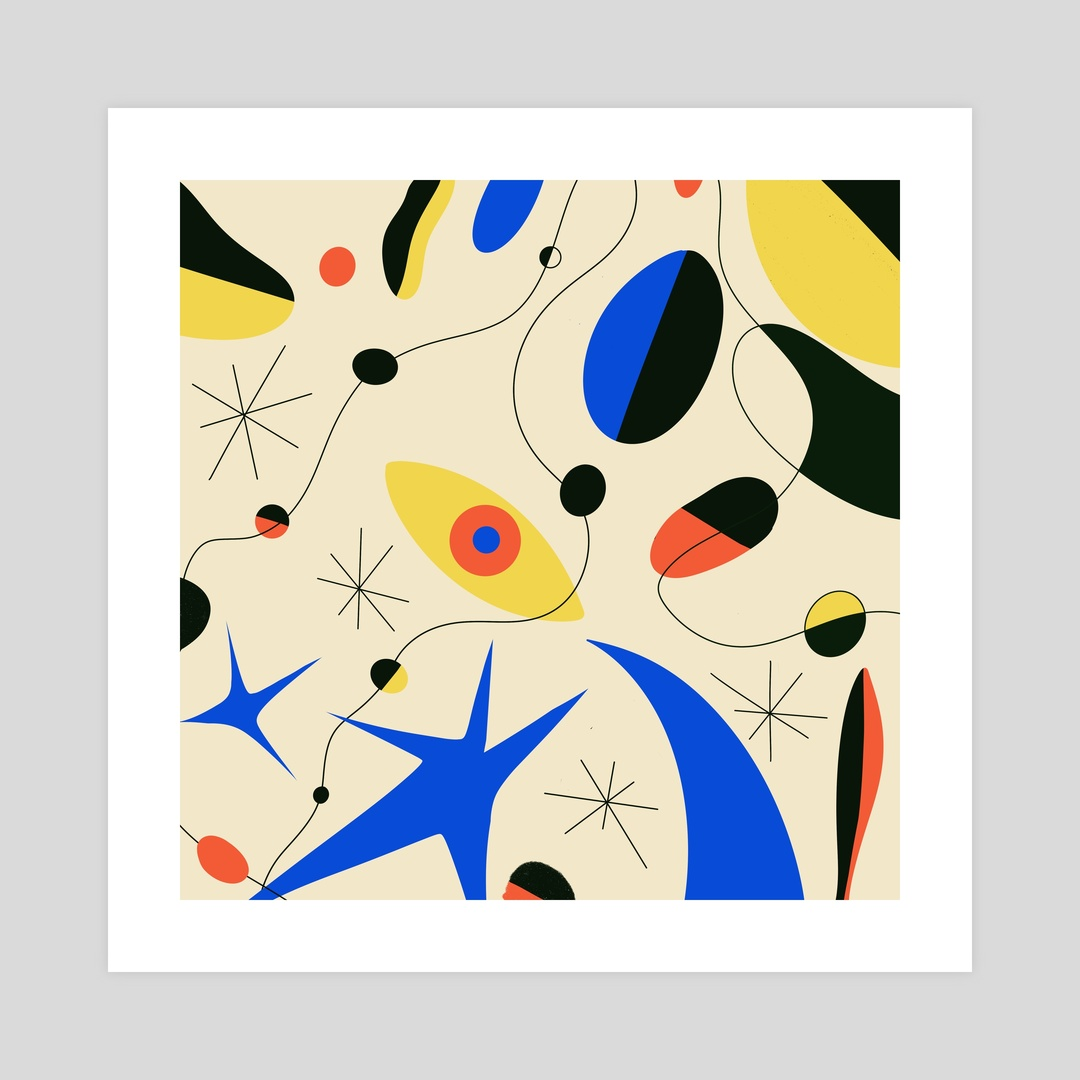

In [17]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [18]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [19]:
response = model.generate_content(img)

to_markdown(response.text)

> This is a very abstract piece of art. It uses various shapes and colors, including circles, teardrop shapes, and stars. It's hard to know what it's supposed to be.  The colors are bright and bold. The artist has used a lot of black and white, which makes the colors stand out more.  It could be interpreted in many different ways, which is part of what makes it so interesting.

In [20]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the artwork in the photo, who is artist and what's kind art style?", img], stream=True)
response.resolve()

In [21]:
to_markdown(response.text)

> ##  A Splash of Color: Exploring the Art of Joan Miró
> 
> This vibrant artwork, bursting with color and geometric shapes, is a prime example of Joan Miró's signature style. Miró, a renowned Spanish painter and sculptor, was a key figure in the Surrealist movement, known for his whimsical and dreamlike imagery.
> 
> The piece before us features a playful combination of organic and geometric shapes. We see a mix of circles, ovals, and stars, each rendered in bold primary colors – blues, reds, yellows, and blacks – against a soft cream background. 
> 
> Miró’s work often evokes a sense of childlike wonder and a fascination with the subconscious. The playful arrangement of shapes and the bold use of color create a sense of movement and energy, inviting the viewer to engage with the artwork on a purely visual level.
> 
> This piece is not just a beautiful arrangement of colors; it's a gateway to Miró's world, a world filled with imagination, creativity, and the joy of pure visual expression. 


## chat

In [22]:
model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [23]:
response = chat.send_message("In one sentence, explain how a smart phone to a child.")
to_markdown(response.text)

> A smartphone is like a tiny computer you can carry in your pocket, which lets you talk to people, play games, watch videos, and learn new things. 


In [24]:
chat.history

[parts {
   text: "In one sentence, explain how a smart phone to a child."
 }
 role: "user",
 parts {
   text: "A smartphone is like a tiny computer you can carry in your pocket, which lets you talk to people, play games, watch videos, and learn new things. \n"
 }
 role: "model"]

will see new chat session appended to history list 

In [25]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A
________________________________________________________________________________
 smartphone is a powerful, pocket-sized computer with a touchscreen interface that combines the
________________________________________________________________________________
 functionality of a phone, a camera, a music player, an internet browser,
________________________________________________________________________________
 and much more. It allows you to communicate with others, access vast amounts of information, entertain yourself, and manage your daily life, all in one device.
________________________________________________________________________________
 

________________________________________________________________________________


In [26]:
chat.history

[parts {
   text: "In one sentence, explain how a smart phone to a child."
 }
 role: "user",
 parts {
   text: "A smartphone is like a tiny computer you can carry in your pocket, which lets you talk to people, play games, watch videos, and learn new things. \n"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A smartphone is a powerful, pocket-sized computer with a touchscreen interface that combines the functionality of a phone, a camera, a music player, an internet browser, and much more. It allows you to communicate with others, access vast amounts of information, entertain yourself, and manage your daily life, all in one device. \n"
 }
 role: "model"]

In [27]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a smart phone to a child.

> **model**: A smartphone is like a tiny computer you can carry in your pocket, which lets you talk to people, play games, watch videos, and learn new things. 


> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A smartphone is a powerful, pocket-sized computer with a touchscreen interface that combines the functionality of a phone, a camera, a music player, an internet browser, and much more. It allows you to communicate with others, access vast amounts of information, entertain yourself, and manage your daily life, all in one device. 


## Count token

In [28]:
model.count_tokens("What is genAI?")

total_tokens: 5

In [29]:
model.count_tokens(chat.history)

total_tokens: 132

## Embeddings
With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings.

In [30]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is genAI?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.00067465234, -0.020503446, 0.018540338, 0.0025 ... TRIMMED]


In [31]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is genAI?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.003801215, 0.0036047278, 0.017527528, 0.0165100 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


In [32]:
response.candidates[0].content

parts {
  text: "A smartphone is a powerful, pocket-sized computer with a touchscreen interface that combines the functionality of a phone, a camera, a music player, an internet browser, and much more. It allows you to communicate with others, access vast amounts of information, entertain yourself, and manage your daily life, all in one device. \n"
}
role: "model"

In [33]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[0.024883801, -0.043118794, 0.005227617, -0.012332 ... TRIMMED ...


In [34]:
chat.history

[parts {
   text: "In one sentence, explain how a smart phone to a child."
 }
 role: "user",
 parts {
   text: "A smartphone is like a tiny computer you can carry in your pocket, which lets you talk to people, play games, watch videos, and learn new things. \n"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A smartphone is a powerful, pocket-sized computer with a touchscreen interface that combines the functionality of a phone, a camera, a music player, an internet browser, and much more. It allows you to communicate with others, access vast amounts of information, entertain yourself, and manage your daily life, all in one device. \n"
 }
 role: "model"]

In [35]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[0.0026864337, -0.052095037, -0.033811938, 0.00760 ... TRIMMED...
[0.010171368, -0.035331555, -0.012351132, -0.00184 ... TRIMMED...
[-0.010055617, -0.07208932, -0.00011750793, -0.023 ... TRIMMED...
[0.024883801, -0.043118794, 0.005227617, -0.012332 ... TRIMMED...


## Safety settings

In [36]:
response = model.generate_content('[Questionable prompt here]')
response.candidates

[index: 0
content {
  parts {
    text: "Please provide me with the prompt you\'d like me to respond to. I\'m happy to help, but I need to know what you\'re asking! \n\nOnce you share the prompt, I can analyze it and determine if it\'s something I can appropriately respond to. \n\nI\'m here to provide helpful and harmless information, so don\'t hesitate to ask me anything! \n"
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [37]:
response.prompt_feedback

In [38]:
response = model.generate_content('[Questionable prompt here]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text
to_markdown(response.text)

> Please provide me with the prompt you'd like me to review. I'm here to help you understand if it's potentially problematic and to suggest ways to make it more appropriate. 
> 
> I can help you with:
> 
> * **Identifying potential biases or harmful stereotypes:** I can analyze the prompt for language that might perpetuate harmful biases or stereotypes.
> * **Assessing ethical implications:** I can help you think through the potential consequences of using the prompt, especially in terms of its impact on different groups of people.
> * **Suggesting alternative prompts:** I can offer alternative prompts that address the same topic or idea in a more respectful and inclusive way.
> 
> I'm committed to promoting ethical and responsible AI use, and I'm here to help you create prompts that are both insightful and harmless. 


## Encode messages

In [39]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(
    genai.protos.Content(
        parts = [
            genai.protos.Part(text="Write a short, engaging blog post based on this picture."),
            genai.protos.Part(
                inline_data=genai.protos.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path('image.jpg').read_bytes()
                )
            ),
        ],
    ),
    stream=True)

In [40]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

> ## A Blast From the Past: The Enduring Appeal of Mid-Century Modern Art
> 
> There's something undeniabl... [TRIMMED] ...

## Multi-turn conversations

genai.ChatSession is just a wrapper around GenerativeModel.generate_content.

In [41]:
model = genai.GenerativeModel('gemini-1.5-flash')

messages = [
    {'role':'user',
     'parts': ["Briefly explain how a smart phone works to a child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine your smartphone is like a tiny, magical computer that fits in your hand! It's like having a whole world of information and fun in your pocket.
> 
> Here's how it works:
> 
> * **Brain:** Inside your phone is a powerful brain called a processor. It's like the super smart part of your phone that lets it do all the cool things.
> * **Eyes:** The screen is like your phone's eyes. It shows you pictures, videos, and words so you can see what's happening.
> * **Ears:** The speaker lets you hear music, games, and your friends' voices when you talk on the phone.
> * **Mouth:** The microphone lets your phone hear you when you talk to it or record your voice.
> * **Magic Touch:** You can tap, swipe, and pinch the screen to tell your phone what you want to do. It's like magic!
> 
> With all these parts working together, your phone can:
> 
> * **Play Games:** You can race cars, build things, and solve puzzles on your phone!
> * **Watch Videos:** You can see funny cartoons, learn about animals, and watch your favorite shows.
> * **Talk to Friends:** You can call or video chat with your friends and family, even if they're far away.
> * **Learn New Things:** You can read books, find out about different topics, and even learn a new language!
> 
> Isn't it amazing how much your phone can do? It's like a pocket-sized adventure! 


In [42]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> Okay, a high school student might be interested in a more technical explanation:
> 
> Your smartphone is essentially a mini-computer packed with advanced technology. It's a complex system that uses many interconnected components to work its magic:
> 
> **1. Hardware:**
> 
> * **Processor (CPU):** This is the brain of your phone, responsible for executing instructions and performing calculations. It's like the central processing unit of a computer.
> * **Memory (RAM):** This is where your phone temporarily stores data that it's currently using. Imagine it as your phone's short-term memory.
> * **Storage:** This is where your phone keeps all your apps, photos, videos, and other data.  It's like your phone's long-term memory. 
> * **Battery:** This powers your phone and is like its fuel source.
> * **Sensors:** Your phone has many sensors that detect movement, light, and even your touch. These help it interact with the world around it.
> * **Display:** The screen is a digital display that shows you information and lets you interact with your phone.
> 
> **2. Software:**
> 
> * **Operating System (OS):**  The OS is the software that manages all the hardware and allows you to use your phone. Android and iOS are the two most popular smartphone operating systems.
> * **Applications (Apps):** These are software programs that let you do specific tasks on your phone, like browsing the internet, playing games, or taking photos.
> * **Network Connectivity:** Your phone uses cellular networks (like 4G or 5G) or Wi-Fi to connect to the internet and communicate with other devices.
> 
> **3. How it Works:**
> 
> * **Input:** You interact with your phone through touch, voice commands, and sensors.
> * **Processing:** The processor analyzes your input and executes instructions based on your commands.
> * **Output:** The results are displayed on your screen, played through speakers, or sent through network connections.
> 
> **Essentially, your smartphone is a sophisticated device that allows you to access information, communicate, and entertain yourself. It's a mini-computer that can fit in your pocket, connecting you to the world in countless ways.** 


## Generation configuration

In [43]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)

In [44]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += '...'

to_markdown(text)

> Elara wasn't sure what was more peculiar, the fact that she'd found a backpack